In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from algorithms_assessment import ValidationCurves, LearningCurves

In [2]:
import importlib
import algorithms_assessment
importlib.reload(algorithms_assessment)

<module 'algorithms_assessment' from '/content/algorithms_assessment.py'>

In [3]:
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

target_names = {0: 'malignant',
               1: 'benign'}
df.target.replace(target_names, inplace=True)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Validation Curves

In [6]:
model = LogisticRegression(C=None, random_state=60)
hyperparameters = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [7]:
# tem que passar pra ingles as coisas ainda antes de postar 
assessment = ValidationCurves(X, y,
                              estimator=model,
                              hyperparameter='C',
                              metric='accuracy',
                              validation=2)

C  =  0.001
Train: 0.954 | Validation: 0.924

C  =  0.01
Train: 0.944 | Validation: 0.926

C  =  0.1
Train: 0.953 | Validation: 0.919

C  =  1
Train: 0.954 | Validation: 0.937

C  =  10
Train: 0.956 | Validation: 0.937

C  =  100
Train: 0.967 | Validation: 0.953

C  =  1000
Train: 0.954 | Validation: 0.94



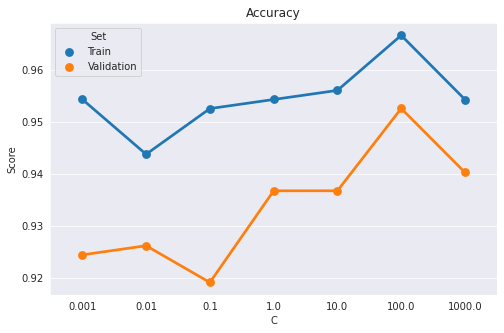

In [8]:
assessment.validation_curves(param_values=hyperparameters)

C  =  0.001
Train: 0.954 | Validation: 0.924

C  =  0.01
Train: 0.944 | Validation: 0.926

C  =  0.1
Train: 0.953 | Validation: 0.919

C  =  1
Train: 0.954 | Validation: 0.937

C  =  10
Train: 0.956 | Validation: 0.937

C  =  100
Train: 0.967 | Validation: 0.953

C  =  1000
Train: 0.954 | Validation: 0.94



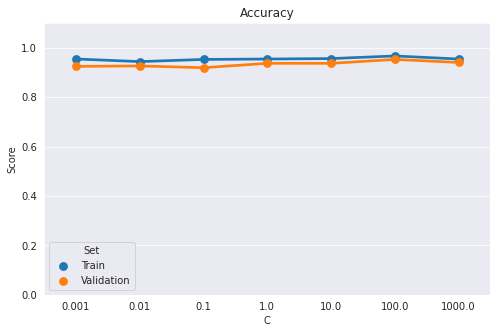

In [9]:
assessment.validation_curves(param_values=hyperparameters, ylim=(0,1.1))

In [10]:
assessment.table

,C,Train,Validation
0,0.001,0.954312,0.924444
1,0.010,0.943767,0.926198
2,0.100,0.952539,0.919144
3,1.000,0.954287,0.936743
4,10.000,0.956035,0.936749
5,100.000,0.966605,0.952557
6,1000.000,0.954281,0.940277


In [11]:
# Decision Tree with recall as metric

depths = [3,5,7,9,11,13,15]
tree = DecisionTreeClassifier(max_depth=None)

recall = make_scorer(recall_score, average='binary', pos_label='benign')

In [12]:
assessment_decision_tree = ValidationCurves(X, y, tree, 'max_depth', recall, 2, metric_name='recall')

max_depth  =  3
Train: 0.992 | Validation: 0.938

max_depth  =  5
Train: 1.0 | Validation: 0.927

max_depth  =  7
Train: 1.0 | Validation: 0.927

max_depth  =  9
Train: 1.0 | Validation: 0.93

max_depth  =  11
Train: 1.0 | Validation: 0.936

max_depth  =  13
Train: 1.0 | Validation: 0.899

max_depth  =  15
Train: 1.0 | Validation: 0.921



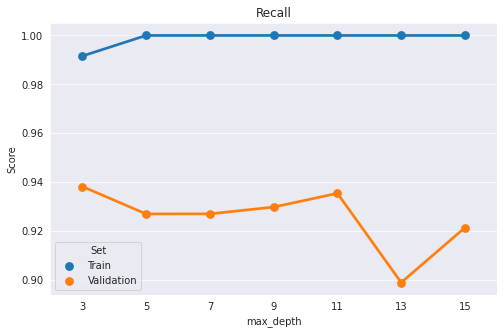

In [13]:
assessment_decision_tree.validation_curves(param_values = depths)

In [14]:
assessment_decision_tree.table

,max_depth,Train,Validation
0,3,0.991589,0.938281
1,5,1.000000,0.927076
2,7,1.000000,0.927108
3,9,1.000000,0.929885
4,11,1.000000,0.935503
5,13,1.000000,0.899049
6,15,1.000000,0.921490


# Learning Curves

In [15]:
tree = DecisionTreeClassifier(max_depth=3, random_state=40)

In [16]:
learning = LearningCurves(X, y, 
                          estimator=tree, 
                          validation=2, 
                          metric='accuracy', 
                          step_size=50, 
                          shuffle=True)

Samples: 50
Train: 1.0 | Validation: 0.88

Samples: 100
Train: 1.0 | Validation: 0.92

Samples: 150
Train: 1.0 | Validation: 0.833

Samples: 200
Train: 0.995 | Validation: 0.915

Samples: 250
Train: 0.996 | Validation: 0.916

Samples: 300
Train: 0.99 | Validation: 0.92

Samples: 350
Train: 0.986 | Validation: 0.934

Samples: 400
Train: 0.975 | Validation: 0.935

Samples: 450
Train: 0.973 | Validation: 0.918

Samples: 500
Train: 0.978 | Validation: 0.928

Samples: 550
Train: 0.98 | Validation: 0.929



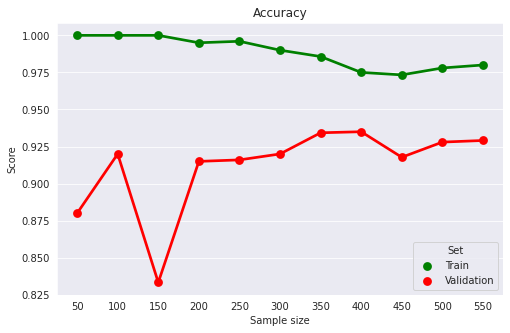

In [17]:
learning.learning_curves()

In [18]:
learning.table

,Sample size,Train,Validation
0,50,1.000000,0.880000
1,100,1.000000,0.920000
2,150,1.000000,0.833333
3,200,0.995000,0.915000
4,250,0.996000,0.916000
5,300,0.990000,0.920000
6,350,0.985714,0.934286
7,400,0.975000,0.935000
8,450,0.973333,0.917778
9,500,0.978000,0.928000
